Here we perform empirical dynamic modeling by explicitly computing the derivatives. The general outline is:
1. Prepare the dataset
2. Generate the training data
3. Train a model
4. Make predictions

In [1]:
import sys
sys.path.append("./source")
from train import *
from predict import *
from model import *
import pickle
import matplotlib.pyplot as plt

# 1. Data Preparation

First of all, let's load the data to see what we have

In [2]:
# load data
with open('./data/cell_cycle.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    
data_array = data_dict['data']
time_points = data_dict['t']
print(data_array)

tf.Tensor(
[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [1.8574454e-01 8.7654376e-03 5.9512700e-04 ... 6.0092352e-06
   9.7030962e-01 9.9376065e-01]
  [3.4569421e-01 3.0824989e-02 4.2587179e-03 ... 4.3429980e-05
   9.4068259e-01 9.9145037e-01]
  ...
  [2.0090375e+00 4.0701852e+00 5.9606433e+00 ... 3.6492196e-01
   1.1248062e-02 1.2336582e-01]
  [2.0141225e+00 4.1121426e+00 6.0291305e+00 ... 3.6592254e-01
   1.1488698e-02 1.2082905e-01]
  [2.0191867e+00 4.1546230e+00 6.0978069e+00 ... 3.6697137e-01
   1.1737520e-02 1.1835048e-01]]], shape=(1, 7500, 7), dtype=float32)


In [3]:
import pandas as pd

df = pd.DataFrame(data_array.numpy()[0])
df.columns = ['cyclin', 'MPF', 'preMPF', 'cdc25P', 'wee1P', 'IEP', 'APC']
df['Strain'] = [0] * df.shape[0]
df = df.set_index('Strain')
df.head()

,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Strain,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058


In [4]:
from generate_dataset import generate_dataset
feature_list = [] # here we do not have external time-series
target_list = ['cyclin', 'MPF', 'preMPF', 'cdc25P', 'wee1P', 'IEP', 'APC']

In [5]:
# add time_points to df
df['Time'] = time_points
df.head()

,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC,Time
Strain,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761,0.2
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450,0.4
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087,0.6
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058,0.8


In [6]:
#testing if it works
df_train = generate_dataset(df, [0],feature_list, target_list, n_dim=100)
display(df_train)

feature    target   feature    target    feature  \
                      cyclin    cyclin       MPF       MPF     preMPF   
Strain Time                                                             
0      0.000000     0.100544  0.083894 -1.486018  0.186644  -4.387189   
       15.149495    1.358783  0.070095  1.313275  0.166328   7.452861   
       30.298990    2.203110  0.042497  3.503171  0.125697  15.138556   
       45.448485    2.633525  0.008383  5.083668  0.115091  18.669897   
       60.597980    2.454577 -0.015550  6.955440  0.062448  18.712543   
...                      ...       ...       ...       ...        ...   
       1439.202020  1.891418  0.000775  5.436756  0.006237   5.484027   
       1454.351515  1.918933  0.001015  5.614956 -0.005976   5.809674   
       1469.501010  1.921852 -0.001105  5.257507 -0.033778   5.727933   
       1484.650505  1.885781 -0.003705  4.601759 -0.053667   5.229732   
       1499.800000  1.810722 -0.005005  3.647711 -0.063612   4.315072   

                      target   feature    target   feature    target  \
                      preMPF    cdc25P    cdc25P     wee1P     wee1P   
Strain Time                                                            
0      0.000000     0.789442  0.065211 -0.006997 -0.040572  0.006591   
       15.149495    0.650945 -0.039724  0.003262  0.058285  0.006850   
       30.298990    0.373951  0.163054  0.023779  0.164906  0.007368   
       45.448485    0.119149  0.673545  0.051605  0.279289  0.010007   
       60.597980   -0.166343  1.711005  0.067599  0.465073  0.008970   
...                      ...       ...       ...       ...       ...   
       1439.202020  0.008551  4.387443  0.000076  0.512721  0.000125   
       1454.351515  0.008131  4.394070 -0.002130  0.512443 -0.000857   
       1469.501010 -0.019334  4.323536 -0.004673  0.487024 -0.001768   
       1484.650505 -0.047102  4.253891 -0.004614  0.459424 -0.001913   
       1499.800000 -0.060985  4.185133 -0.004584  0.429645 -0.001986   

                     feature    target   feature    target  
                         IEP       IEP       APC       APC  
Strain Time                                                 
0      0.000000     0.710310 -0.024215  0.992269 -0.036571  
       15.149495    0.347129 -0.019555  0.443779 -0.029374  
       30.298990    0.123732 -0.010235  0.111170 -0.014980  
       45.448485    0.040118  0.006712 -0.005558  0.004070  
       60.597980    0.325060  0.011899  0.233257  0.015462  
...                      ...       ...       ...       ...  
       1439.202020  0.275165  0.000205  0.368212 -0.000445  
       1454.351515  0.214950 -0.003560  0.345822 -0.001684  
       1469.501010  0.168377 -0.002265  0.317684 -0.000917  
       1484.650505  0.146996 -0.000586  0.318323  0.001002  
       1499.800000  0.150807  0.000254  0.347741  0.001961  

[100 rows x 14 columns]

# 2. Training

In [7]:
# the features are the multi-dimensional time-series concentrations
# the target is the derivative of the dynamics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# TODO: create a random forest model with 20 estimators
rf_model = RandomForestRegressor(n_estimators=20)

# TODO: create a pipeline consisting of: standard scaling of the data + ridge regression
lr_model = Pipeline([('Scaler',StandardScaler()),
                            ('Linear Regressor',BaggingRegressor(base_estimator=Ridge(),
                                                                 n_estimators=20, max_samples=.8,
                                                                 bootstrap=False,
                                                                 bootstrap_features=False,
                                                                 random_state=None))])

# TODO: create a pipeline 
nn_model = Pipeline([('Scaler',StandardScaler()),
                            ('neural_net',MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                                                       learning_rate_init=0.1,
                                                       learning_rate='adaptive',
                                                       solver='adam',
                                                       activation='tanh',
                                                       max_iter=1000))])

cyclin


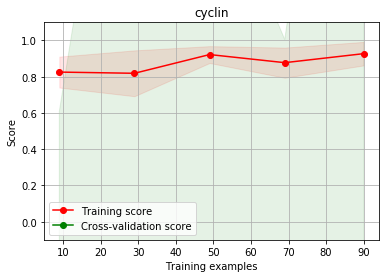

Target: cyclin, CV Pearson R2 coefficient: 0.971677
MPF


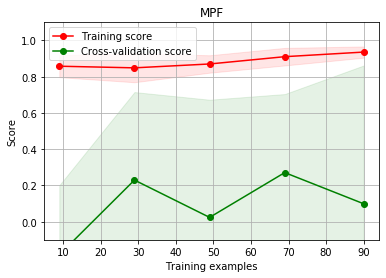

Target: MPF, CV Pearson R2 coefficient: 0.968926
preMPF


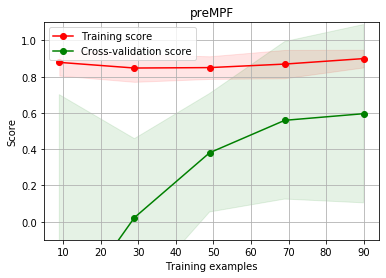

Target: preMPF, CV Pearson R2 coefficient: 0.914137
cdc25P


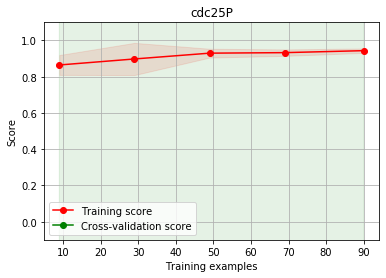

Target: cdc25P, CV Pearson R2 coefficient: 0.942190
wee1P


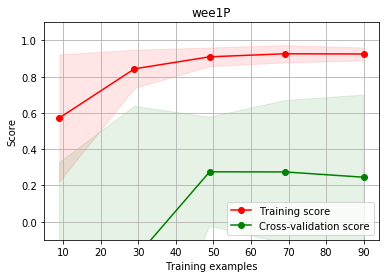

Target: wee1P, CV Pearson R2 coefficient: 0.935298
IEP


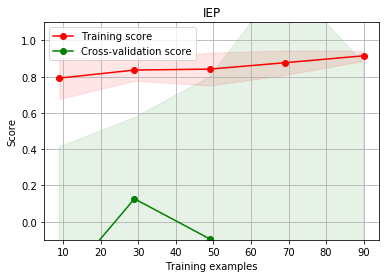

Target: IEP, CV Pearson R2 coefficient: 0.927006
APC


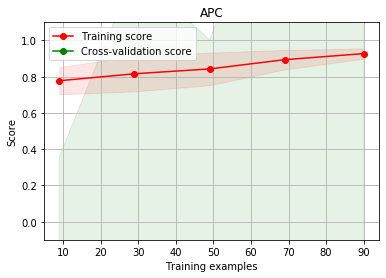

Target: APC, CV Pearson R2 coefficient: 0.905747
Average training score: 0.9378544873926046


In [8]:
## write a function that performs training
from sklearn.base import clone
from sklearn.model_selection import ShuffleSplit
from train_classic import train_classic

figure_path = './plots/'

# train a model
model_type = 'random_forest'
rf_dict, score_dict = train_classic(df_train, rf_model, plot=True,model_type=model_type, figure_path=figure_path) # YOUR CODE HERE

cyclin RMSE: 0.0002149432358225363 standard deviation: 0.002005459310358162


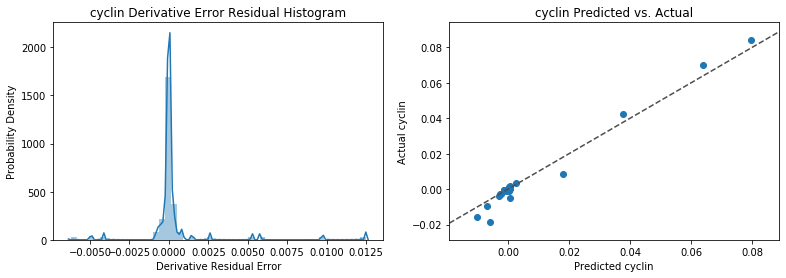

MPF RMSE: -4.945887061318384e-05 standard deviation: 0.005903032240268935


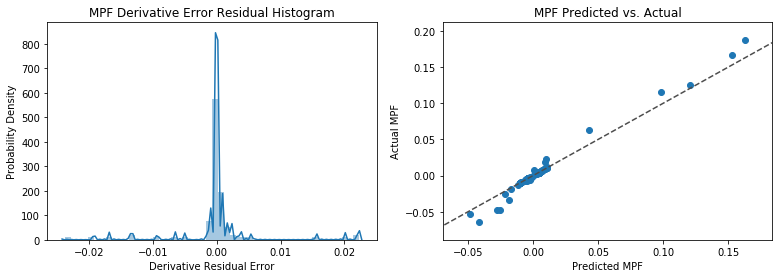

preMPF RMSE: 0.0014218442403429719 standard deviation: 0.035295802403026585


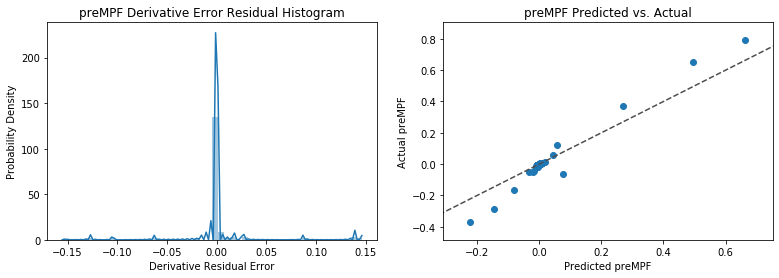

cdc25P RMSE: -0.00013471675838528407 standard deviation: 0.0025893858413920676


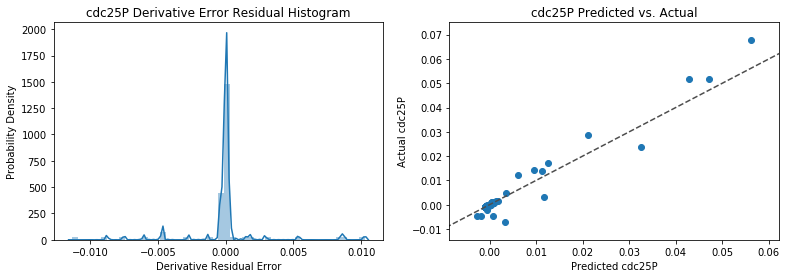

wee1P RMSE: -6.933203042924573e-05 standard deviation: 0.00046935095478627754


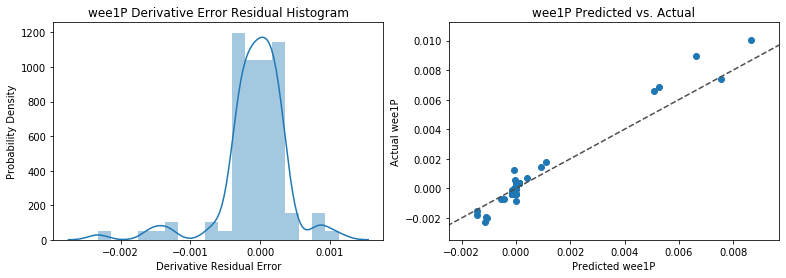

IEP RMSE: -6.746112623296944e-05 standard deviation: 0.0010038818564026477


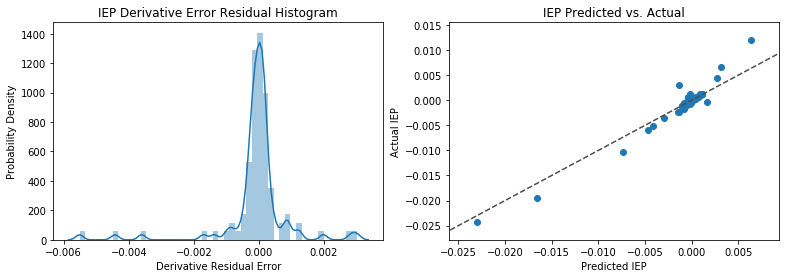

APC RMSE: -5.690767587249386e-05 standard deviation: 0.001633514931275777


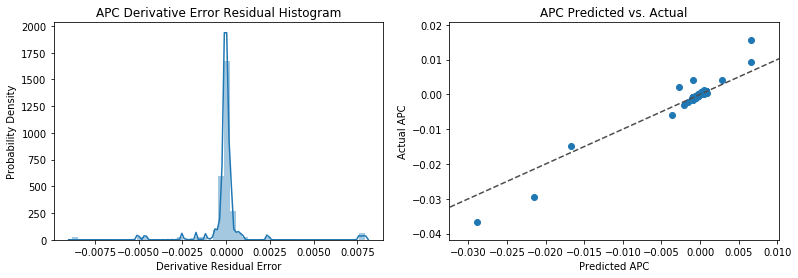

Total Derivative Mean Error: 0.8685195310065303 Error Standard Deviation: 0.02490043580391613


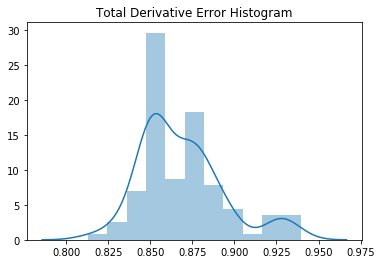

In [9]:
from compute_error import compute_error

# compute the error
compute_error(df_train,rf_dict,plot=True,model_type=model_type)

Real data:


,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Strain,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0,0.185745,0.008765,0.000595,0.000012,0.000006,0.970310,0.993761
0,0.345694,0.030825,0.004259,0.000085,0.000043,0.940683,0.991450
0,0.483463,0.061154,0.012881,0.000260,0.000133,0.911164,0.990087
0,0.602154,0.096144,0.027416,0.000560,0.000285,0.881781,0.989058
...,...,...,...,...,...,...,...
0,1.998806,3.987818,5.824301,3.937864,0.363066,0.010790,0.128617
0,2.003932,4.028746,5.892361,3.936569,0.363970,0.011015,0.125962
0,2.009037,4.070185,5.960643,3.935427,0.364922,0.011248,0.123366


Predicted data:


,cyclin,MPF,preMPF,cdc25P,wee1P,IEP,APC
Time,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0.2,0.015675,0.032344,0.132570,0.000890,0.001015,0.995483,0.994576
0.4,0.031350,0.064689,0.265140,0.001781,0.002029,0.990966,0.989153
0.6,0.047025,0.097033,0.397710,0.002671,0.003044,0.986449,0.983729
0.8,0.062699,0.129377,0.530280,0.003561,0.004059,0.981933,0.978305
...,...,...,...,...,...,...,...
1499.0,8.122421,3.537451,60.277460,51.688684,2.535824,1.952946,1.340799
1499.2,8.125515,3.537179,60.315714,51.695838,2.536185,1.952700,1.340311
1499.4,8.128609,3.536906,60.353968,51.702991,2.536547,1.952454,1.339822


./source/predict_classic.py:216: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_classic.py:221: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: cyclin 112.57414340868753 RMSE percentage: 117.42164941510221


./source/predict_classic.py:221: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: MPF 130.67343794485987 RMSE percentage: 75.67640215531242
ML Fit: preMPF 1084.4544844690076 RMSE percentage: 250.11499578277756
ML Fit: cdc25P 987.0660035760466 RMSE percentage: 217.38490181858654
ML Fit: wee1P 43.06875017119998 RMSE percentage: 140.85602120719932
ML Fit: IEP 43.1177674169907 RMSE percentage: 908.7569662911626
ML Fit: APC 31.425785117952334 RMSE percentage: 225.553451230003
ML model aggregate error
Average RMSE: 347.4829103006778
Total percentage error: 276.53776970002053


NameError: name 'tr_strains' is not defined

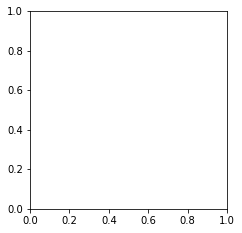

In [10]:
# now we make predictions via numerical integration
# note that in predict_integrate, the function expects a normal dataframe and not the time-series multi-index dataframe
from predict_classic import predict_integrate

predict_integrate(df, df, rf_dict, target_list, feature_list, title='cell cycle', plot=True,model_type=model_type)